In [92]:
#PAA 

from base_functions import *

start, end =  "2020-01-10", "2022-10-10"
tickers = {
    "snp":"^GSPC", #미국 대형주
    "nasdaq":"QQQ",
    "iwm":"IWM", #미국 소형주
    "vgk":"VGK", #유럽 주식
    "ewj":"EWJ", #일본 주식
    "eem":"EEM", #개발도상국 주식
    "vnq":"VNQ", #부동산
    "GLD":"GLD", #금 
    "dbc":"DBC", #원자재
    "hyg":"HYG", #하이랜드 채권
    "lqd":"LQD", #미국 회사채 
    "tlt":"TLT", #미국 장기체   
}

assetCloseData = pd.DataFrame()
for name, ticker in tickers.items():
    assetCloseData[name] = getCloseDataPandas(ticker, start, end)
assetCloseData.dropna(inplace=True)    
assetCloseData   

,snp,nasdaq,iwm,vgk,ewj,eem,vnq,GLD,dbc,hyg,lqd,tlt
Date,,,,,,,,,,,,
2020-01-09,3274.699951,218.990005,165.509995,58.490002,59.939999,45.349998,91.580002,146.029999,15.870000,88.360001,128.339996,137.220001
2020-01-10,3265.350098,218.429993,164.889999,58.209999,59.520000,45.590000,92.279999,146.910004,15.870000,88.389999,128.699997,138.440002
2020-01-13,3288.129883,220.949997,165.960007,58.500000,59.860001,46.299999,93.389999,145.820007,15.750000,88.389999,128.389999,138.020004
2020-01-14,3283.149902,220.080002,166.570007,58.540001,59.880001,46.040001,93.040001,145.690002,15.820000,88.379997,128.550003,138.729996
2020-01-15,3289.290039,220.169998,167.369995,58.560001,59.660000,45.680000,93.879997,146.539993,15.740000,88.400002,128.830002,139.649994
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-04,3790.929932,282.130005,176.000000,49.389999,51.320000,36.610001,83.250000,160.699997,25.110001,73.519997,104.480003,103.540001
2022-10-05,3783.280029,281.980011,174.699997,48.619999,50.779999,36.630001,81.620003,159.809998,25.559999,73.230003,103.690002,102.550003
2022-10-06,3744.520020,279.760010,173.720001,47.560001,50.320000,36.410000,79.349998,159.630005,25.719999,73.010002,103.449997,101.980003


In [93]:
safeCloseData = pd.DataFrame()
safeCloseData["ief"] = getCloseDataPandas("IEF", start, end)
safeCloseData

,ief
Date,
2020-01-09,111.010002
2020-01-10,111.250000
2020-01-13,111.120003
2020-01-14,111.339996
2020-01-15,111.620003
...,...
2022-10-04,97.139999
2022-10-05,96.220001
2022-10-06,95.690002


In [94]:
pd.set_option("display.max_rows", 20)
def getWeights(closeDataSet, n = 12):
    priceOnRebalDate = closeDataSet.loc[getRebalancingDate(closeDataSet)] # 리밸런싱 일자의 가격 데이터
    avg = priceOnRebalDate.copy()
    
    for i in range(1, n):
        avg += priceOnRebalDate.shift(i).fillna(method="bfill")
    avg = avg / n
        
    status = pd.DataFrame([], index=avg.index)
    for asset, assetCloseData in priceOnRebalDate.iteritems():
        status[asset] = np.where(assetCloseData < avg[asset], 0, 1)
    status.iloc[0] = 0
    print("rising:\n", status)    

    totalWeight = pd.DataFrame([], index=avg.index)
    status["sum"] =  status.apply(np.sum, axis=1)
    totalWeight["risk"] = np.where(status["sum"] < 6, status["sum"]/6, 1.0)
    totalWeight["safe"] = np.where(totalWeight["risk"] < 1, 1 - totalWeight["risk"], 0.0)
    print("total weights:\n", totalWeight)

    for asset, row in status.iteritems():
        status[asset] = np.where(status[asset] == 1, totalWeight["risk"]/status["sum"], 0)
    status =status.drop(columns="sum")
    status["ief"] = totalWeight["safe"]
    print("asset weights:\n", status)
    
        
    return status
    
    

weights = getWeights(assetCloseData)


rising:
             snp  nasdaq  iwm  vgk  ewj  eem  vnq  GLD  dbc  hyg  lqd  tlt
Date                                                                     
2020-01-31    0       0    0    0    0    0    0    0    0    0    0    0
2020-02-28    0       0    0    0    0    0    0    0    0    0    1    1
2020-03-31    0       0    0    0    0    0    0    0    0    0    0    1
2020-04-30    0       1    0    0    0    0    0    1    0    0    0    1
2020-05-29    0       1    0    0    0    0    0    1    0    0    1    1
...         ...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
2022-06-30    0       0    0    0    0    0    0    0    1    0    0    0
2022-07-29    0       0    0    0    0    0    0    0    1    0    0    0
2022-08-31    0       0    0    0    0    0    0    0    1    0    0    0
2022-09-30    0       0    0    0    0    0    0    0    0    0    0    0
2022-10-10    0       0    0    0    0    0    0    0    1    0    0    0

[34 rows x 12 columns]
total

In [95]:
closeData = pd.concat([assetCloseData, safeCloseData], axis=1)
print(closeData)

                    snp      nasdaq         iwm        vgk        ewj  \
Date                                                                    
2020-01-09  3274.699951  218.990005  165.509995  58.490002  59.939999   
2020-01-10  3265.350098  218.429993  164.889999  58.209999  59.520000   
2020-01-13  3288.129883  220.949997  165.960007  58.500000  59.860001   
2020-01-14  3283.149902  220.080002  166.570007  58.540001  59.880001   
2020-01-15  3289.290039  220.169998  167.369995  58.560001  59.660000   
...                 ...         ...         ...        ...        ...   
2022-10-04  3790.929932  282.130005  176.000000  49.389999  51.320000   
2022-10-05  3783.280029  281.980011  174.699997  48.619999  50.779999   
2022-10-06  3744.520020  279.760010  173.720001  47.560001  50.320000   
2022-10-07  3639.659912  269.100006  168.610001  46.669998  49.810001   
2022-10-10  3612.389893  266.410004  167.669998  46.470001  49.610001   

                  eem        vnq         GLD      

In [96]:
dayRet, cumRet = getRebalancingPortfolio(closeData, weightDf=weights)
cagr, dd, mdd = getEval(cumRet)
print(cumRet)

return: 1.2104986465858874 
 cagr: 1.0734723863642666 
 mdd: 17.41778305933746
Date
2020-01-31    1.000000
2020-02-03    0.997808
2020-02-04    0.992020
2020-02-05    0.987724
2020-02-06    0.988425
                ...   
2022-10-04    1.242212
2022-10-05    1.230448
2022-10-06    1.223670
2022-10-07    1.217660
2022-10-10    1.210499
Length: 679, dtype: float64


<Figure size 640x480 with 0 Axes>

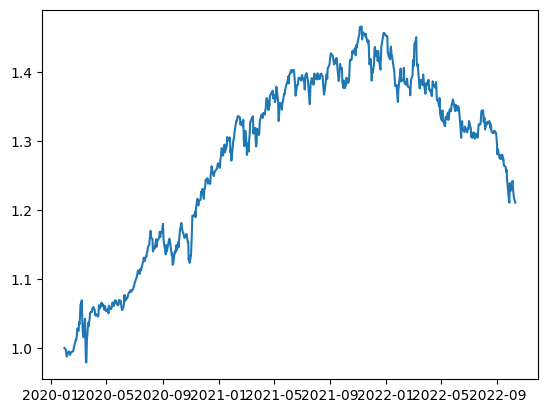

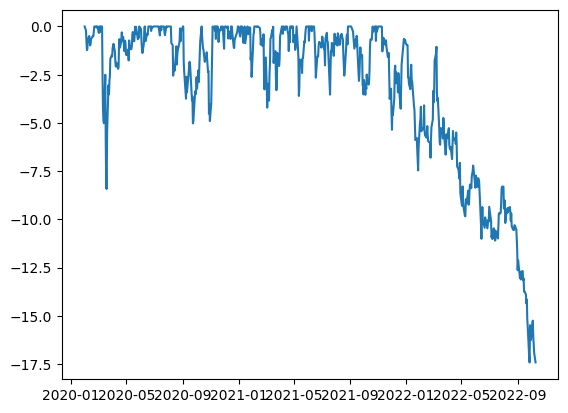

In [97]:
plt.figure()
plt.subplots()
plt.plot(cumRet)
plt.subplots()
plt.plot(-dd)